In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


### 1. How many unique products are there in the dataset? (5 marks)
You need to find product ID of each product from product_link and then find the number of unique product ids

- Finding Unique Products as per their Product ID
- Removing Products with Duplicate Product ID

In [7]:
df['product_id'] = df['product_link'].str.split('/').str[-2]

print(df['product_id'] )

df_unique = df.drop_duplicates(subset=['product_id'])


num_unique_products = df_unique['product_id'].nunique()


print("Number of Products: ", len(df))
print("Number of Unique Products: ", num_unique_products)

0         18070682
1         12548958
2         13446092
3         18017006
4         18015232
            ...   
168024    18245896
168025    18713222
168026    18713224
168027    18054182
168028    18511552
Name: product_id, Length: 168029, dtype: object
Number of Products:  168029
Number of Unique Products:  146435


### 2. What is the average rating of the products? (2 mark)
- Try it without the product that are having rating 0
- Try it without the product that are having 0 people given any rating

In [19]:
df_filtered = df[(df['rating'] > 0) & (df['rating_count'] > 0)]

avg_rating = df_filtered['rating'].mean()


print("Average Rating: ", avg_rating)

Average Rating:  4.16546541286693


### 3. What is the average discount percentage of the products? (1 mark)

In [21]:
Avg_disc=df['discount_percent'].mean()
print(Avg_disc)

37.25190889667855


### 4. What are the top 5 most expensive products? (2 marks)
- Make sure that there can be multiple brands with same name so you can take brand ID also into considration

In [5]:

max_discounted_prices = df.groupby(['product_name', 'brand_tag'])['discounted_price'].max()


sorted_prices = max_discounted_prices.sort_values(ascending=False)

top_5_expensive = sorted_prices.head(5)


print(top_5_expensive)


product_name                               brand_tag  
Men Automatic Motion Watch                 d1-milano      45900
Lord Krishna Showpiece                     ecraftindia    45599
Ready to Wear Lehenga Blouse With Dupatta  masaba         45000
Airwrap Complete Hair Styler               dyson          44900
Women                                      tom-ford       43900
Name: discounted_price, dtype: int64


### 5. What are the top 10 brands by the number of products in the dataset? (2 mark)

In [8]:
brand_product_counts = df.groupby('brand_name')['product_id'].nunique()

# Sort the resulting Series in descending order
sorted_counts = brand_product_counts.sort_values(ascending=False)

# Take the top 10 rows from the sorted Series
top_10_brands = sorted_counts.head(10)

# Print the result
print(top_10_brands)

brand_name
Roadster                 4557
Mast & Harbour           2397
DressBerry               2073
H&M                      1998
Anouk                    1784
max                      1772
HRX by Hrithik Roshan    1734
Puma                     1667
MANGO                    1625
HERE&NOW                 1612
Name: product_id, dtype: int64


### 6. List top 5 brands with maxiumum average rating of products? (2 marks)
Neglect the products which are not reviewed by any person

In [14]:
# Filter the dataset to include only products with at least one rating
rated_products = df[df['rating_count'] > 0]

# Calculate the average rating for each brand based on the filtered dataset
brand_ratings = rated_products.groupby('brand_name')['rating'].mean()

# Sort the resulting Series in descending order
sorted_ratings = brand_ratings.sort_values(ascending=False)

# Take the top 5 rows from the sorted Series
top_5_brands = sorted_ratings.head(5)

# Print the result
print(top_5_brands)

brand_name
1 Stop Fashion              5.0
Luxure by Louis Philippe    5.0
Tiara                       5.0
Anahi                       5.0
SHIRT THEORY                5.0
Name: rating, dtype: float64


### 7. Plot a histogram of the distribution of ratings of following brand. (3 marks)
- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person

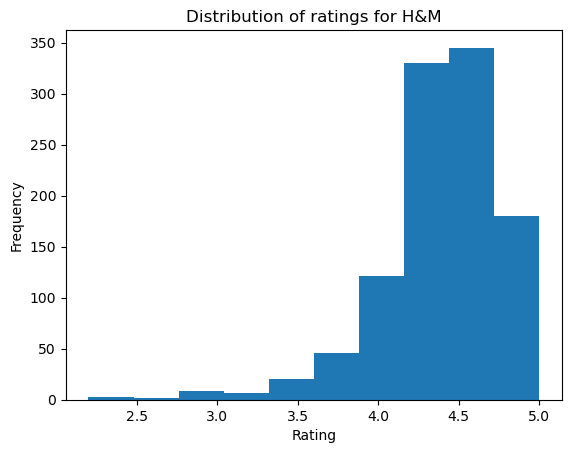

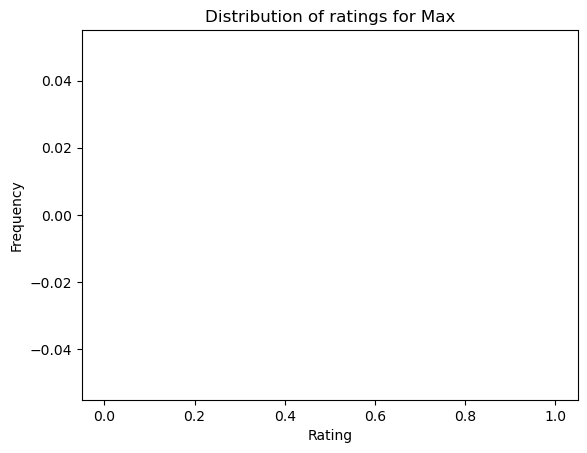

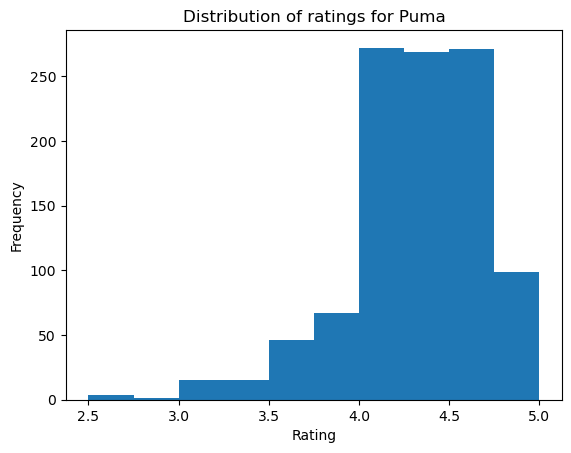

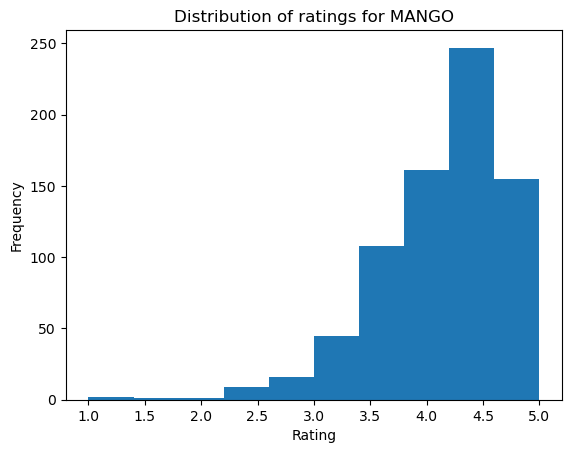

In [21]:



# Define a list of the four brands we want to plot histograms for
brands = ['H&M', 'Max', 'Puma', 'MANGO']

# Loop over the brands and plot a histogram for each one
for brand in brands:
    # Filter the dataset to include only products with at least one rating for this brand
    rated_products = df[(df['brand_name'] == brand) & (df['rating'] > 0)]
    
    # Create a new DataFrame containing only the ratings column
    ratings = rated_products['rating']
    
    # Plot a histogram of the ratings
    plt.hist(ratings, bins=10)
    plt.title(f'Distribution of ratings for {brand}')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()


### 8. What is the distribution of discounts by brand for specific brands mentioned below? (2 marks)

- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person.
Neglect the products which are not on any discount.

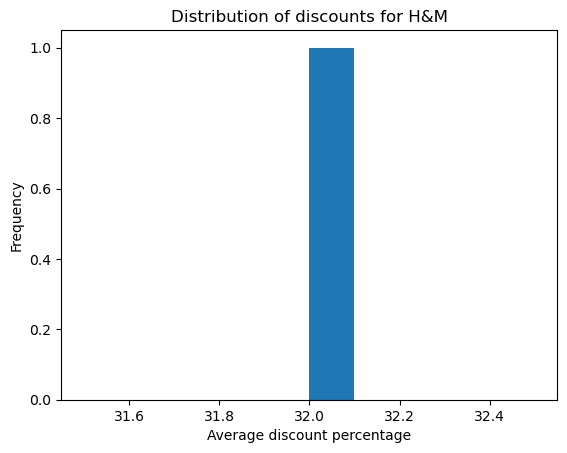

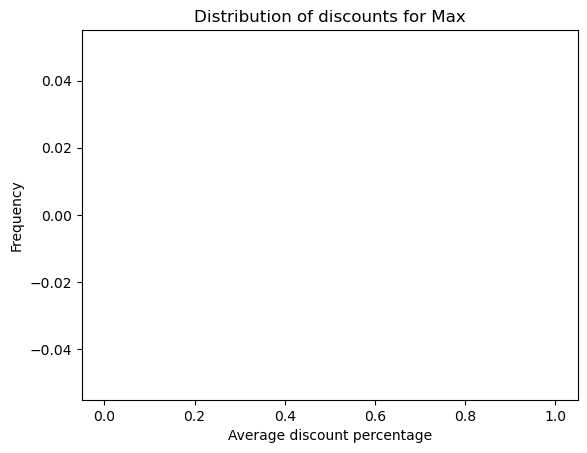

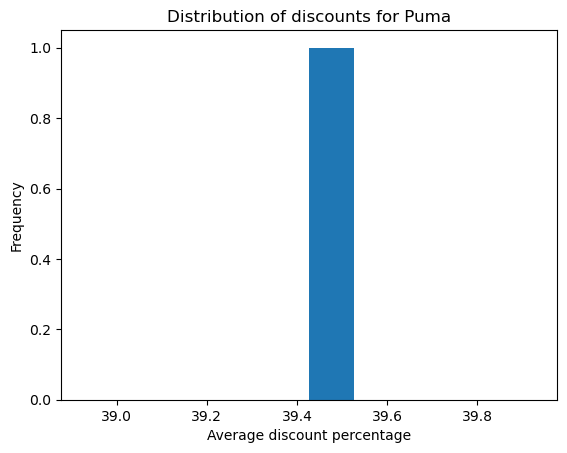

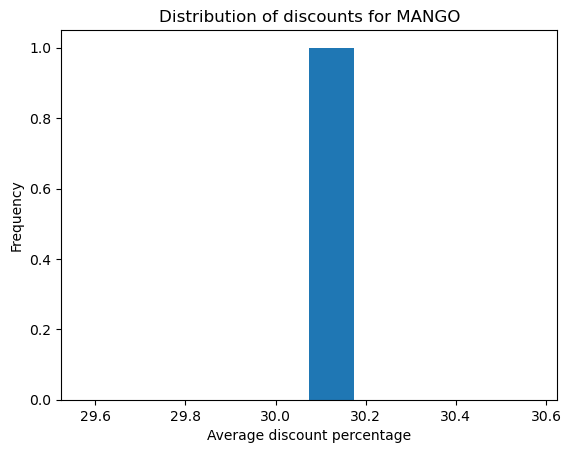

In [24]:

# Define a list of the four brands we want to plot histograms for
brands = ['H&M', 'Max', 'Puma', 'MANGO']

# Loop over the brands and plot a histogram for each one
for brand in brands:
    # Filter the dataset to include only products with at least one review and one discount for this brand
    valid_products = df[(df['brand_name'] == brand) & (df['rating'] > 0) & (df['discount_percent'] > 0)]
    
    # Group the valid_products by brand and calculate the average discount percentage for each brand
    brand_discounts = valid_products.groupby('brand_name')['discount_percent'].mean()
    
    # Plot a histogram of the average discount percentages
    plt.hist(brand_discounts, bins=10)
    plt.title(f'Distribution of discounts for {brand}')
    plt.xlabel('Average discount percentage')
    plt.ylabel('Frequency')
    plt.show()


### 9. Is there any trend or pattern you can find between discount percent and rating of the product? (3 marks)

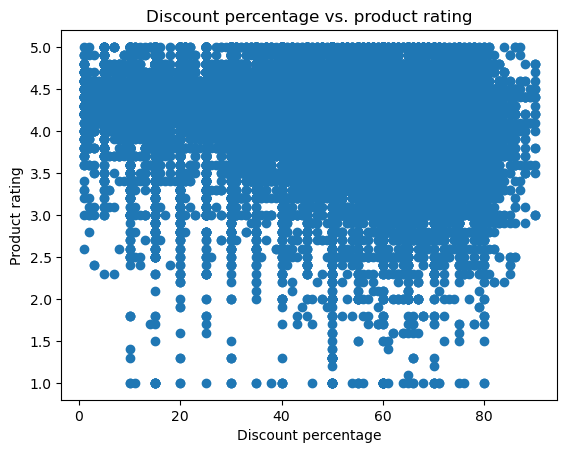

In [26]:
valid_products = df[(df['rating'] > 0) & (df['discount_percent'] > 0)]

# Plot a scatter plot of discount percentage vs. rating
plt.scatter(valid_products['discount_percent'], valid_products['rating'])
plt.title('Discount percentage vs. product rating')
plt.xlabel('Discount percentage')
plt.ylabel('Product rating')
plt.show()

### 10. What are the top 10 most popular tags in the dataset? (2 marks)

In [27]:
df['brand_tag'] = df['brand_tag'].str.split(',')

# Create a new DataFrame with one row for each brand tag
tags_df = df.explode('brand_tag')

# Count the number of occurrences of each brand tag
tag_counts = tags_df['brand_tag'].value_counts()

# Get the top 10 most common brand tags
top_tags = tag_counts.head(10)

# Print the results
print(top_tags)

roadster                 4982
mast--harbour            2640
dressberry               2330
hm                       2188
max                      2045
anouk                    1962
hrx-by-hrithik-roshan    1922
herenow                  1816
puma                     1805
mango                    1741
Name: brand_tag, dtype: int64


### 11. Are there any relations between the rating and number of people who rated the products? (4 marks)
- Neglect the products that are not reviewed by any person
- Neglect the products that are having zero rating

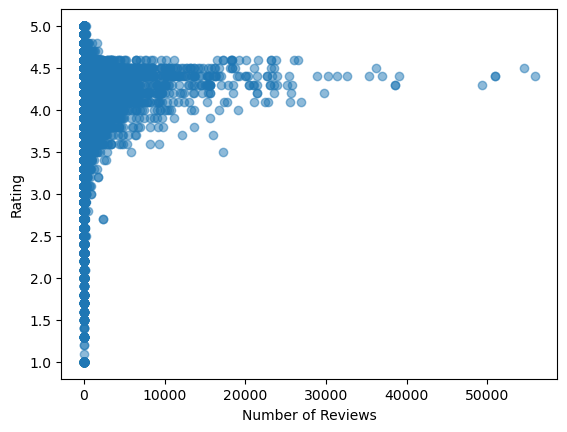

In [30]:
df = df[(df['rating'] != 0) & (df['rating_count'] != 0)]

# Create a scatter plot of the data
plt.scatter(df['rating_count'], df['rating'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

### 12. What are the top 10 Most Expensive brands? (3 marks)
- Use marked price as the reference to find the most expensive brand

In [33]:
brand_prices = df.groupby('brand_name')['marked_price'].mean()

# Sort the brands by their average marked price and select the top 10
top_brands = brand_prices.sort_values(ascending=False)[:10]

# Print the top 10 brands
print(top_brands)

brand_name
dyson                       39233.333333
EARNSHAW                    30950.000000
Apple                       26300.000000
swatika                     25000.000000
Swiss Military by Chrono    24750.000000
TISSOT                      24500.000000
SEIKO                       21666.666667
MORKANTH JEWELLERY          20000.000000
BMW                         19995.000000
Michael Kors                17135.000000
Name: marked_price, dtype: float64


### 13. What are the top 10 Most Expensive Product Category? (4 marks)
- Use marked price as the reference to find the most expensive brand

In [34]:
category_prices = df.groupby('product_tag')['marked_price'].mean()

# Sort the categories by their average marked price and select the top 10
top_categories = category_prices.sort_values(ascending=False)[:10]

# Print the top 10 categories
print(top_categories)

product_tag
watch-gift-set     12346.645161
trolley-bag        11823.054545
fitness-bands      11165.666667
suits              10664.813084
smart-watches       9587.023529
floor-lamps         9111.000000
sherwani            8613.816092
bar-accessories     7833.333333
mirrors             7699.200000
lehenga-choli       7149.302222
Name: marked_price, dtype: float64


### 14. Analyse the Violen Plot of watches of following brands mentioned below ? (5 marks)

 - Take Marked Price for Reference
 - Take product_tag as watches
 - Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot
 - Make sure to write your inference based on the violen plot of following watch brands price

In [43]:
products = df[(df['product_tag'] == 'watches') & 
              (df['brand_name'].isin(['tommy-hilfiger', 'daniel-wellington', 'armani-exchange', 'emporio-armani', 'earnshaw', 'tissot']))]

print(products)
# Create the violin plot using Seaborn
sns.violinplot(x='brand_tag', y='marked_price', data=products)

# Show the plot
plt.show()

Empty DataFrame
Columns: [product_name, brand_name, rating, rating_count, marked_price, discounted_price, sizes, product_link, img_link, product_tag, brand_tag, discount_amount, discount_percent, product_id]
Index: []


ValueError: min() arg is an empty sequence

### 15. List top 5 brands which are having most wide range or products
- Use marked price as the reference

In [45]:
df = df[df['marked_price'].notnull()]

# group the dataset by brand tag
grouped = df.groupby('brand_tag')

# calculate the difference between the maximum and minimum marked price for each brand
ranges = grouped['marked_price'].apply(lambda x: x.max() - x.min())
print(ranges)
# sort the brands based on the difference and take the top 5
top_brands = ranges.sort_values(ascending=False)[:5]

print(top_brands)








TypeError: unhashable type: 'list'